In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np
import models.nestd
import os

from theanomodels.utils.misc import loadHDF5
import utils
import h5py

Populating the interactive namespace from numpy and matplotlib


## Find files named 'config.json' and load them into a dataframe

In [2]:
configs = utils.extract_configs('output/002_10seeds/')
configs.iloc[:5]

output/002_10seeds/ApproxM2/cw128_seed1  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed10  \
KL_loggamma_coef                                              1   
LogitNormalMP                                               NaN   
alpha_inference_layers                                        2   
annealBP                                                      1   
annealBound                                                   1   

                       output/002_10seeds/ApproxM2/cw128_seed2  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed3  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed4  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed5  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed6  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed7  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed8  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                       output/002_10seeds/ApproxM2/cw128_seed9  \
KL_loggamma_coef                                             1   
LogitNormalMP                                              NaN   
alpha_inference_layers                                       2   
annealBP                                                     1   
annealBound                                                  1   

                                             ..

## Get differences between runs

In [3]:
keys_that_are_different = []
keys_to_omit = ['timestamp']
for k in configs.index:
    if k not in keys_that_are_different:
        if (configs.T.duplicated(k,keep='first')==False).sum()>1:
            keys_that_are_different.append(k)

In [4]:
configs.loc[keys_that_are_different].T

LogitNormalMP betamax  \
output/002_10seeds/ApproxM2/cw128_seed1                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed10                     NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed2                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed3                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed4                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed5                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed6                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed7                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed8                      NaN     NaN   
output/002_10seeds/ApproxM2/cw128_seed9                      NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed1                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed10                      NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed2                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed3                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed4                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed5                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed6                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed7                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed8                       NaN     NaN   
output/002_10seeds/ExactM2/cw128_seed9                       NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh...           NaN     NaN   
...                                                          ...     ...   
output/002_10seeds/LogisticNormalM2/cw128_seed1              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed10             NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed2              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed3              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed4              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed5              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed6              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed7              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed8              NaN     NaN   
output/002_10seeds/LogisticNormalM2/cw128_seed9              NaN     NaN   
output/002_10seeds/MLP/cw128_seed1                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed10                          NaN     NaN   
output/002_10seeds/MLP/cw128_seed2                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed3                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed4                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed5                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed6                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed7                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed8                           NaN     NaN   
output/002_10seeds/MLP/cw128_seed9                           NaN     NaN   
output/002_10seeds/STGumbelSoftmaxM2/cw128_seed1             NaN     NaN   
output/002_10seeds/STGu

## Generate a name-mapping

In [5]:
keys_to_include = [
    'model',
    'sharpening',
    'seed',
]
defaults = {
    'sharpening': 1,
    'seed': 0,
}
remap_name = {
    'sharpening': 'shrp',
}

def generate_name(key,value):
    if key in remap_name:
        rkey = remap_name[key]
    else:
        rkey = key
    if value is None or value==False:
        return ''
    elif key in defaults and value==defaults[key]:
        return ''
    elif isinstance(value,bool) and value==True:
        return rkey
    elif key=='model':
        return value
    else:
        return '%s=%s' % (rkey,value)
    
name_map = {}
for c in configs.columns:
    name = configs.loc[keys_to_include,c]
    name_str_list = filter(len,map(generate_name,*zip(*name.iteritems())))
    name = ' '.join(name_str_list)
    name_map[c] = name

In [6]:
name_map

{'output/002_10seeds/ApproxM2/cw128_seed1': u'ApproxM2 seed=1',
 'output/002_10seeds/ApproxM2/cw128_seed10': u'ApproxM2 seed=10',
 'output/002_10seeds/ApproxM2/cw128_seed2': u'ApproxM2 seed=2',
 'output/002_10seeds/ApproxM2/cw128_seed3': u'ApproxM2 seed=3',
 'output/002_10seeds/ApproxM2/cw128_seed4': u'ApproxM2 seed=4',
 'output/002_10seeds/ApproxM2/cw128_seed5': u'ApproxM2 seed=5',
 'output/002_10seeds/ApproxM2/cw128_seed6': u'ApproxM2 seed=6',
 'output/002_10seeds/ApproxM2/cw128_seed7': u'ApproxM2 seed=7',
 'output/002_10seeds/ApproxM2/cw128_seed8': u'ApproxM2 seed=8',
 'output/002_10seeds/ApproxM2/cw128_seed9': u'ApproxM2 seed=9',
 'output/002_10seeds/ExactM2/cw128_seed1': u'ExactM2 seed=1',
 'output/002_10seeds/ExactM2/cw128_seed10': u'ExactM2 seed=10',
 'output/002_10seeds/ExactM2/cw128_seed2': u'ExactM2 seed=2',
 'output/002_10seeds/ExactM2/cw128_seed3': u'ExactM2 seed=3',
 'output/002_10seeds/ExactM2/cw128_seed4': u'ExactM2 seed=4',
 'output/002_10seeds/ExactM2/cw128_seed5': u'E

In [7]:
reverse_name_map = {v:k for k,v in name_map.iteritems()}

## Load results

In [8]:
results = models.nestd.NestD({k:loadHDF5(os.path.join(k,'output.h5')) for k in name_map})

In [9]:
results.apply(np.shape)[:,'train']

NestD{
 output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh3_seed10: NestD{
   loss: (301,)
   p(x,y): NestD{
     bound: (301,)
     nllX: (301,)
     nllY: (301,)
     logbeta: (301,)
     eps: (301,)
     KL: (301,)
     mu: (301,)
     logcov2: (301,)
     KL_Z: (301,)
     objfunc: (301,)
     Z: (301,)
     NLL: (301,)}
   hyperparameters: NestD{
     sharpening: (301,)
     annealing: NestD{
       sharpening: (301,)
       KL_alpha: (301,)
       bound: (301,)
       KL_Z: (301,)
       classifier: (301,)}
     lr: (301,)
     update_ctr: (301,)}
   boundU: (301,)
   bound: (301,)
   pnorm: (301,)
   gnorm: (301,)
   epoch: (301,)
   q(y|x): NestD{
     logbeta: (301,)}
   objective: (301,)
   p(x): NestD{
     bound: (301,)
     nllX: (301,)
     logbeta: (301,)
     eps: (301,)
     KL: (301,)
     mu: (301,)
     logcov2: (301,)
     KL_Y: (301,)
     KL_Z: (301,)
     objfunc: (301,)
     Z: (301,)
     NLL: (301,)}
   boundL: (301,)
   classifier: (301,)
   duration (seconds):

## Calculate results across seeds

    First, add a level to the hierarchy with the model name

In [10]:
results2 = models.nestd.NestD({k:{configs.T['model'][k]:results[k]} for k in results})

    Next, collapse results along the first level (collapse will combine all leaves into a list for each keypath)

In [11]:
collapsed = results2.collapse(levels=[0])

In [12]:
collapsed.apply(len)[:,'train','accuracy']

NestD{
 GumbelSoftmaxM2: 10
 ExactM2: 10
 LogisticNormal: 10
 LogisticNormalM2: 10
 STGumbelSoftmaxM2: 10
 LogGamma: 10
 MLP: 10
 ApproxM2: 10}

    Next, concatenate each list at the leaves

In [13]:
def concatenate(X):
    return np.concatenate([np.expand_dims(x,-1) for x in X],axis=-1)

concatenated = collapsed.apply(concatenate)

In [14]:
concatenated.apply(np.shape)[:,'train','accuracy']

NestD{
 GumbelSoftmaxM2: (301, 10)
 ExactM2: (301, 10)
 LogisticNormal: (301, 10)
 LogisticNormalM2: (301, 10)
 STGumbelSoftmaxM2: (301, 10)
 LogGamma: (301, 10)
 MLP: (301, 10)
 ApproxM2: (301, 10)}

    Next, calculate statistics at each leaf

In [15]:
def calc_statistics(x):
    return models.nestd.NestD({
        'mean': np.mean(x,axis=-1),
        'median': np.median(x,axis=-1),
        'std': np.std(x,axis=-1),
        'p10': np.percentile(x,q=10,axis=-1),
        'p90': np.percentile(x,q=90,axis=-1),
    })

In [16]:
stats = concatenated.apply(calc_statistics)

In [17]:
stats.apply(np.shape)[:,'train','accuracy']

NestD{
 GumbelSoftmaxM2: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 ExactM2: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 LogisticNormal: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 LogisticNormalM2: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 STGumbelSoftmaxM2: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 LogGamma: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 MLP: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}
 ApproxM2: NestD{
   std: (301,)
   p10: (301,)
   mean: (301,)
   median: (301,)
   p90: (301,)}}

## Plotting Functions

In [18]:
def plot_result(x,y=None,label=None,title=None,best_val_func=None,best_val_format=None,**plt_kwargs): 
    if y is None:
        y = x
        x = np.arange(len(y))
    if label is not None and best_val_func is not None:
        best_val = best_val_format.format(best_val_func(y['mean']))
        label = '%s (%0.0fep) %s' % (best_val,max(x),label)
    if label is not None:
        plt.plot(x,y['mean'],label=label,**plt_kwargs)
    else:
        plt.plot(x,y['mean'],**plt_kwargs)
    plt.fill_between(x,y['p10'],y['p90'],color='b',alpha=0.05,**plt_kwargs)
        
def plot_parameters(legend_loc=None,xlim=None,ylim=None,xlabel=None,ylabel=None,**kwargs):
    if legend_loc is not None:
        plt.legend(**legend_loc)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    if xlim is not None:
        ply.xlim(*xlim)
        
        
def plot_experiment(results,keys=['accuracy','loss'],epoch_field='epoch',title=None,**kwargs):
    n = len(keys)
    for i,k in enumerate(keys):
        plt.subplot(1,n,i+1)
        for s in results[:,k]:
            epochs = results[s,epoch_field]
            if 'mean' in epochs:
                epochs = epochs['mean']
            vals = results[s,k]
            plot_result(epochs,vals,label=s,**kwargs[k]['result_settings'])
        if title is None:
            plt.title(k)
        else:
            plt.title('%s %s' % (title,k))
        plot_parameters(**kwargs[k]['plot_parameters'])

## Plot Results

In [19]:
plot_settings = {
    'accuracy': {
        'result_settings': {
            'best_val_func': max,
            'best_val_format': '{:0.3f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'lower right'},
            'ylim':(0.5,1),
            'xlabel':'epochs',
        }
    },
    'loss': {
        'result_settings': {
            'best_val_func': min,
            'best_val_format': '{:0.1f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'upper left'},
            'ylim':(100,1000),
            'xlabel':'epochs',
        }
    },
    
}

In [20]:
seaborn.set_palette(seaborn.color_palette("hls", len(stats)))

In [23]:
if not os.path.exists('plots'):
    os.system('mkdir plots')

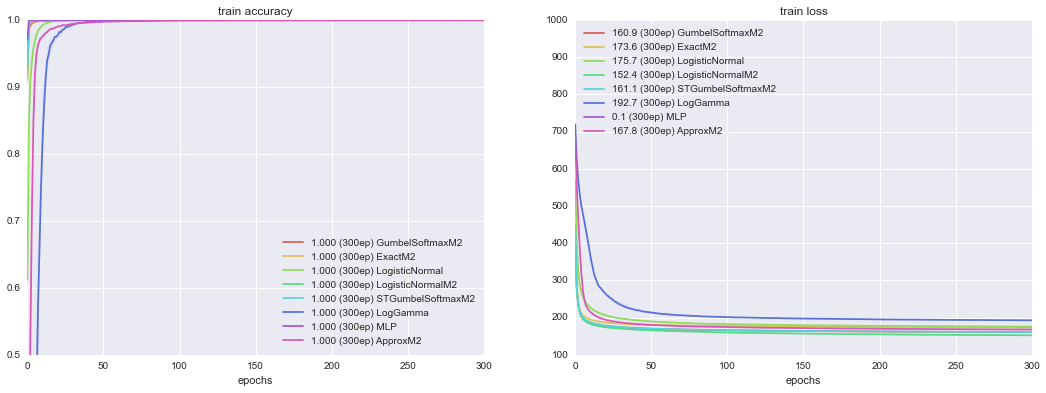

In [24]:
plt.figure(1,figsize=(18,6),dpi=320)
plot_experiment(stats[:,'train'],title='train',**plot_settings)
plt.savefig('plots/multi_seed_accuracy_loss_train.png')

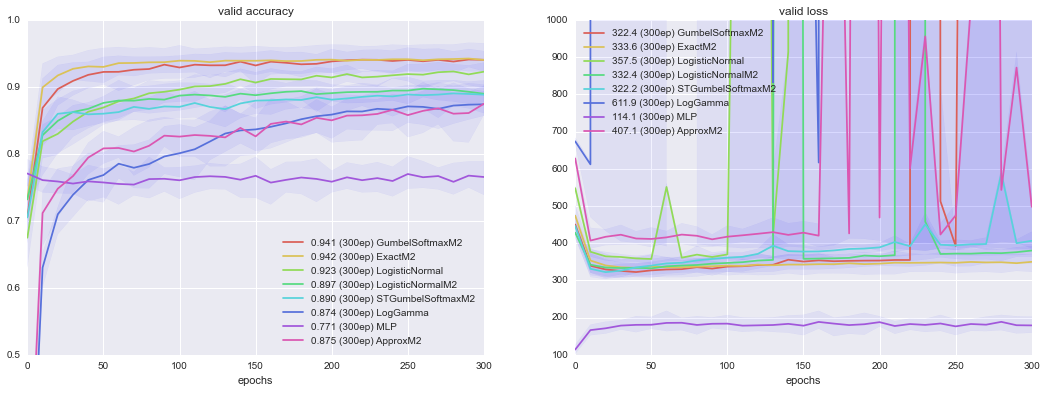

In [25]:
plt.figure(1,figsize=(18,6),dpi=320)
plot_experiment(stats[:,'valid'],title='valid',**plot_settings)
plt.savefig('plots/multi_seed_accuracy_loss_validation.png')

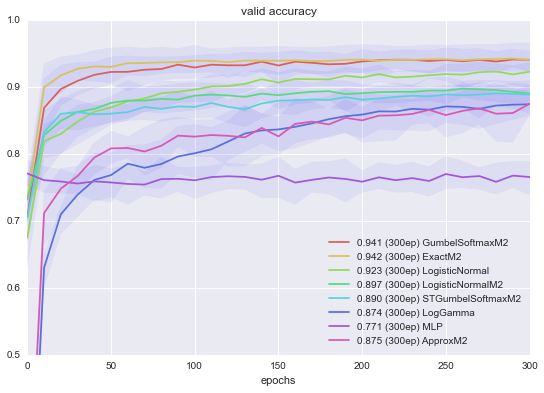

In [26]:
plt.figure(1,figsize=(9,6),dpi=320)
plot_experiment(stats[:,'valid'],keys=['accuracy'],title='valid',**plot_settings)
plt.xlabel('epochs')
os.system('mkdir plots')
plt.savefig('plots/multi_seed_accuracy_validation.png')

## KL_Z: load mu & logcov2 from output_verbose

In [38]:
def applyfunc(d):
    if isinstance(d,h5py.Group):
        return models.nestd.NestD(d).apply(applyfunc)
    else:
        return d
    
def deepcopy(f):
    if isinstance(f,h5py.Group):
        y = {}
        for k,v in f.iteritems():
            y[k] = deepcopy(v)
        return y
    else:
        return f

def load_mu_logcov2(filepath):
    with h5py.File(filepath,'r') as f:
        x = deepcopy(f)
        x = models.nestd.NestD(x)
        x = x[:,:,['mu','logcov2']]
        x = x.apply(lambda v:v.value)
    return x

def load_y(filepath):
    with h5py.File(filepath,'r') as f:
        return models.nestd.NestD(f).apply(applyfunc)[:,:,['y']].apply(np.array)

In [51]:
results_mu_logcov = {}
for k in sorted(name_map):
    filepath = os.path.join(k,'output_verbose.h5')
    x = loadHDF5(filepath)
    x = models.nestd.NestD(x)
    x = x[:,:,['mu','logcov2']]
    results_mu_logcov[name_map[k]] = x

In [52]:
results_mu_logcov = models.nestd.NestD(results_mu_logcov)

## KL_Z: Calculate KL

In [54]:
def find_and_apply(x,findfunc,applyfunc):
    if isinstance(x,models.nestd.NestD):
        if findfunc(x):
            return applyfunc(x)
        else:
            y = models.nestd.NestD()
            for k in x:
                y[k] = find_and_apply(x[k],findfunc,applyfunc)
            return y
    else:
        return x

def gaussian_kl(mu,logcov2):
    return models.nestd.NestD({'KL':0.5*(np.exp(logcov2)+mu**2.0-1.0-logcov2)})

find_keys = ['mu','logcov2']
results_KL = find_and_apply(results_mu_logcov,
                            findfunc=lambda x: all([k in x for k in find_keys]),
                            applyfunc=lambda x: {k:x[k] for k in find_keys}).apply(lambda x: gaussian_kl(**x))


In [55]:
results_KL.apply(np.shape)

NestD{
 GumbelSoftmaxM2 shrp=3.0 seed=7: NestD{
   test: NestD{
     p(x,y): NestD{
       KL: (100, 50)}
     p(x): NestD{
       KL: (100, 50)}}
   train: NestD{
     p(x,y): NestD{
       KL: (30100, 50)}
     p(x): NestD{
       KL: (30100, 50)}}
   valid: NestD{
     p(x,y): NestD{
       KL: (3100, 50)}
     p(x): NestD{
       KL: (3100, 50)}}}
 MLP seed=9: NestD{ }
 MLP seed=1: NestD{ }
 ExactM2 seed=3: NestD{
   test: NestD{
     p(x,y): NestD{
       KL: (100, 50)}
     p(x): NestD{
       KL: (100, 50)}}
   train: NestD{
     p(x,y): NestD{
       KL: (30100, 50)}
     p(x): NestD{
       KL: (30100, 50)}}
   valid: NestD{
     p(x,y): NestD{
       KL: (3100, 50)}
     p(x): NestD{
       KL: (3100, 50)}}}
 LogisticNormal seed=9: NestD{
   test: NestD{
     p(x,y): NestD{
       KL: (100, 50)}
     q(y|x): NestD{
       KL: (100, 10)}
     p(x): NestD{
       KL: (100, 50)}}
   train: NestD{
     p(x,y): NestD{
       KL: (30100, 50)}
     q(y|x): NestD{
       KL: (30100, 

## KL_Z: plot the KL divergence at each latent Z node over iterations

In [56]:
def plot_KL_heatmap(data,title=None,xticks=None,figsize=(18,5)):
    plt.figure(1,figsize=figsize)
    plt.pcolor(data.T,cmap='jet')
    plt.xlim(0,data.shape[0])
    plt.ylim(0,data.shape[1])
    if xticks is not None:
        plt.xticks(xticks)
    if title is not None:
        plt.title(title)
    plt.xlabel('examples ordered by iteration #')
    plt.ylabel('Z index')

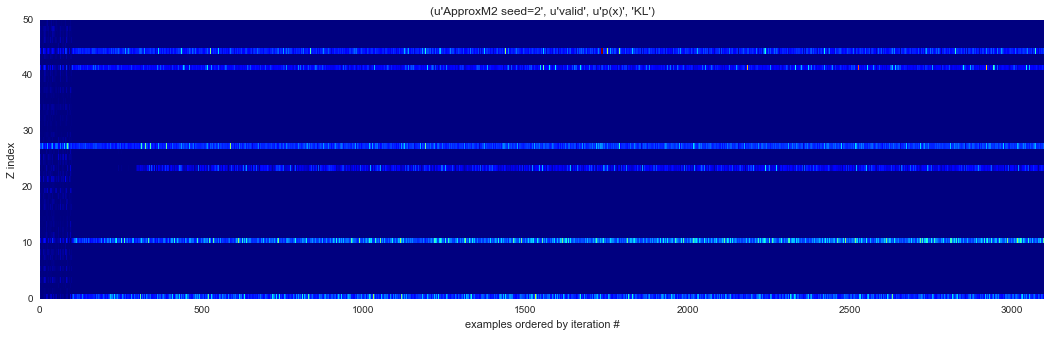

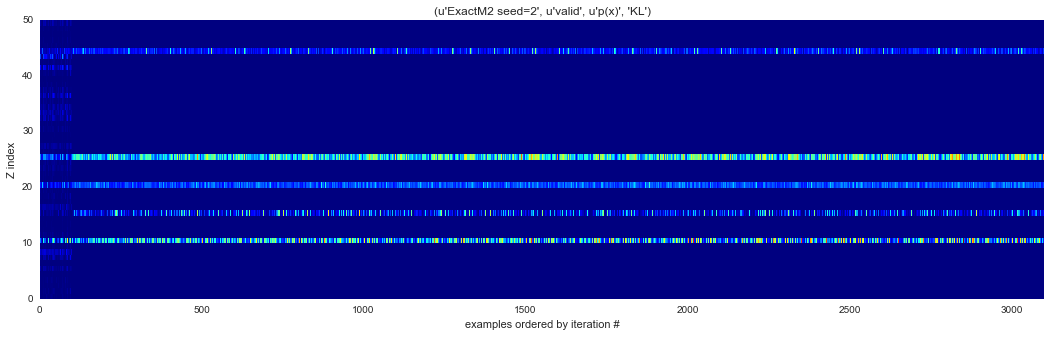

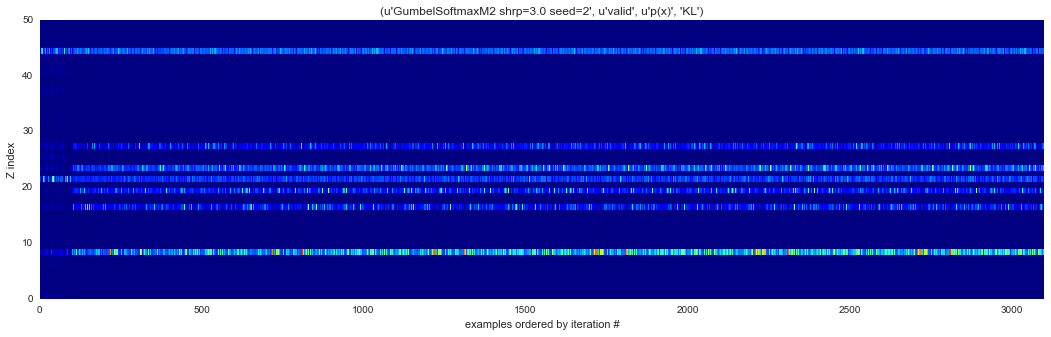

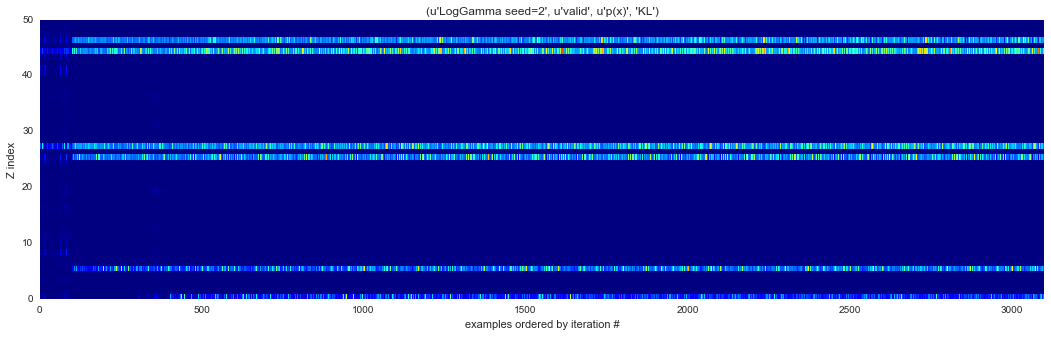

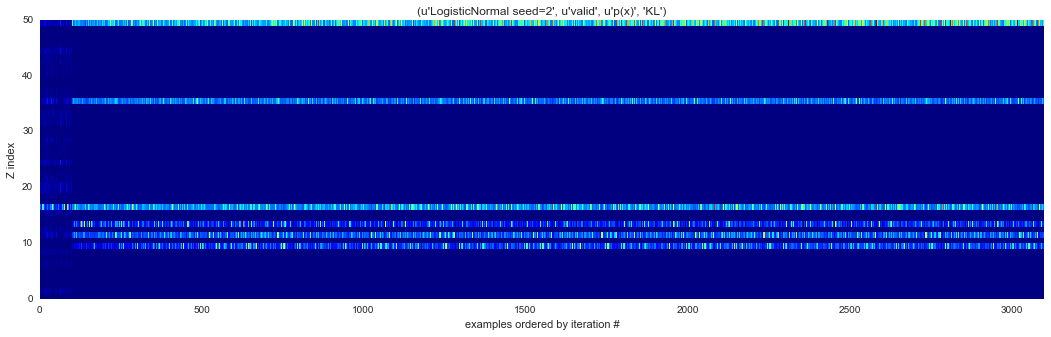

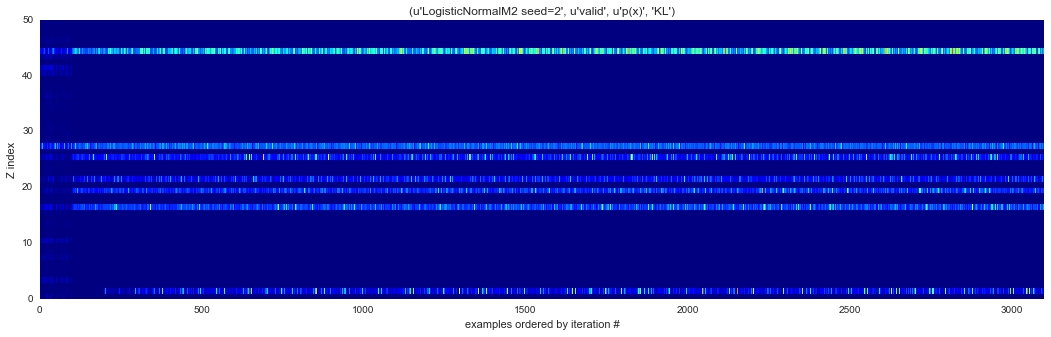

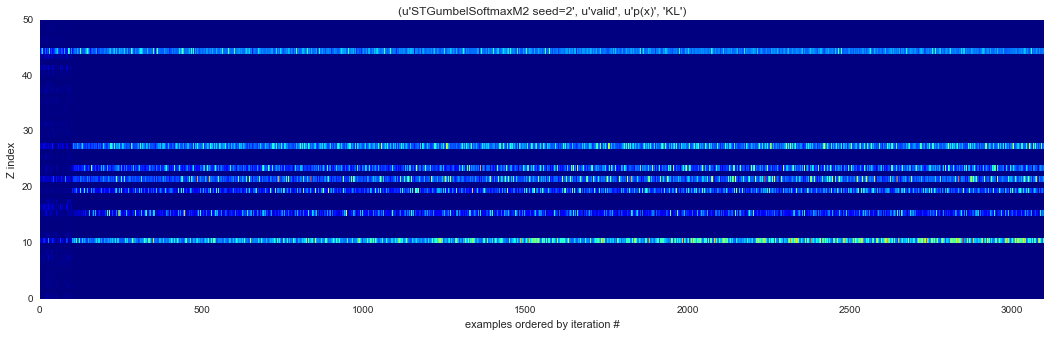

In [57]:
for kl_name,kl in sorted(list(results_KL[:,['valid'],['p(x)']].walk())):
    if 'seed=2' in kl_name[0]:
        plot_KL_heatmap(kl,kl_name)
        plt.savefig('plots/KL_Z_%s.png' % kl_name[0].split()[0])
        plt.show()

## Samples

In [34]:
samples = {}
for k in sorted(name_map):
    filepath = os.path.join(k,'samples.h5')
    if os.path.exists(filepath):
        with h5py.File(filepath,'r') as f:
            x = deepcopy(f)
            x = models.nestd.NestD(x)
            x = x.apply(lambda v:v.value)
        samples[name_map[k]] = x
samples = models.nestd.NestD(samples)

In [35]:
samples_reshaped = samples.prune().apply(lambda x: x.reshape(-1,28,28))
samples_reshaped.apply(np.shape)

NestD{
 LogGamma seed=6: NestD{
   U: NestD{
     p: (31000, 28, 28)}
   L: NestD{
     p: (31000, 28, 28)}}
 STGumbelSoftmaxM2 seed=2: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 ExactM2 seed=10: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 ExactM2 seed=6: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 GumbelSoftmaxM2 shrp=3.0 seed=9: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 GumbelSoftmaxM2 shrp=3.0 seed=1: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 ApproxM2 seed=1: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 LogisticNormal seed=6: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x): NestD{
     p: (31000, 28, 28)}}
 ApproxM2 seed=3: NestD{
   p(x,y): NestD{
     p: (31000, 28, 28)}
   p(x)

In [36]:
def todisplayimage(x,cols=25,sep=3,split=100):
    n,m1,m2 = x.shape
    Y = []
    for s in range(0,n,split):
        rows = int(np.ceil(split/float(cols)))
        y = np.zeros((rows*(m1+sep),cols*(m2+sep)))
        c=0
        for j in range(s,min(n,s+split)):
            i = j % split
            c = i % cols
            r = int(np.floor(i/cols))
            #print s,i,n,r*(m1+sep),r*(m1+sep)+m1,c*(m2+sep),c*(m2+sep)+m2
            y[r*(m1+sep):r*(m1+sep)+m1,c*(m2+sep):c*(m2+sep)+m2] = x[j]
        Y.append(y)
    YY = [Y[0]]
    for y in Y[1:]:
        YY.append(np.zeros((sep*4,cols*(m2+sep))))
        YY.append(y)    
    return np.concatenate(YY,axis=0)

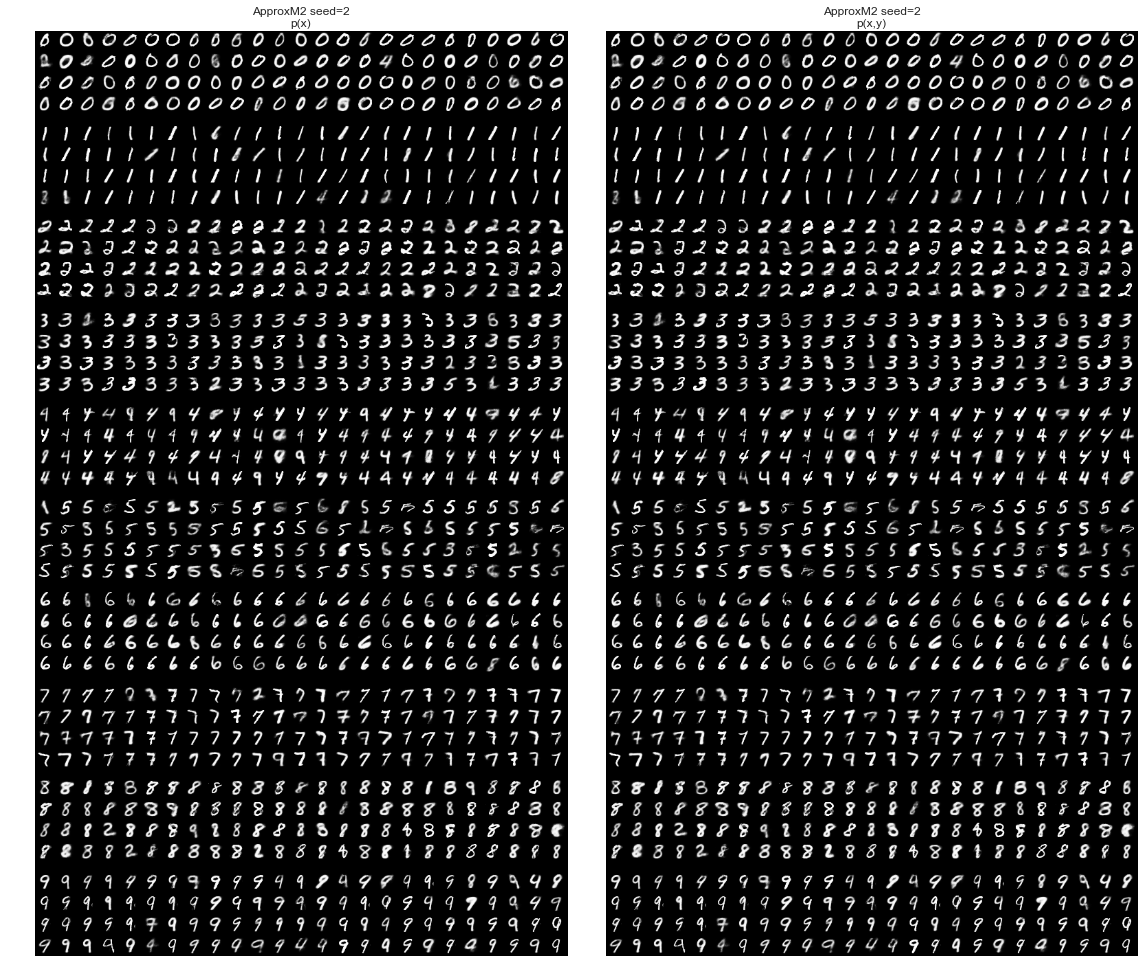

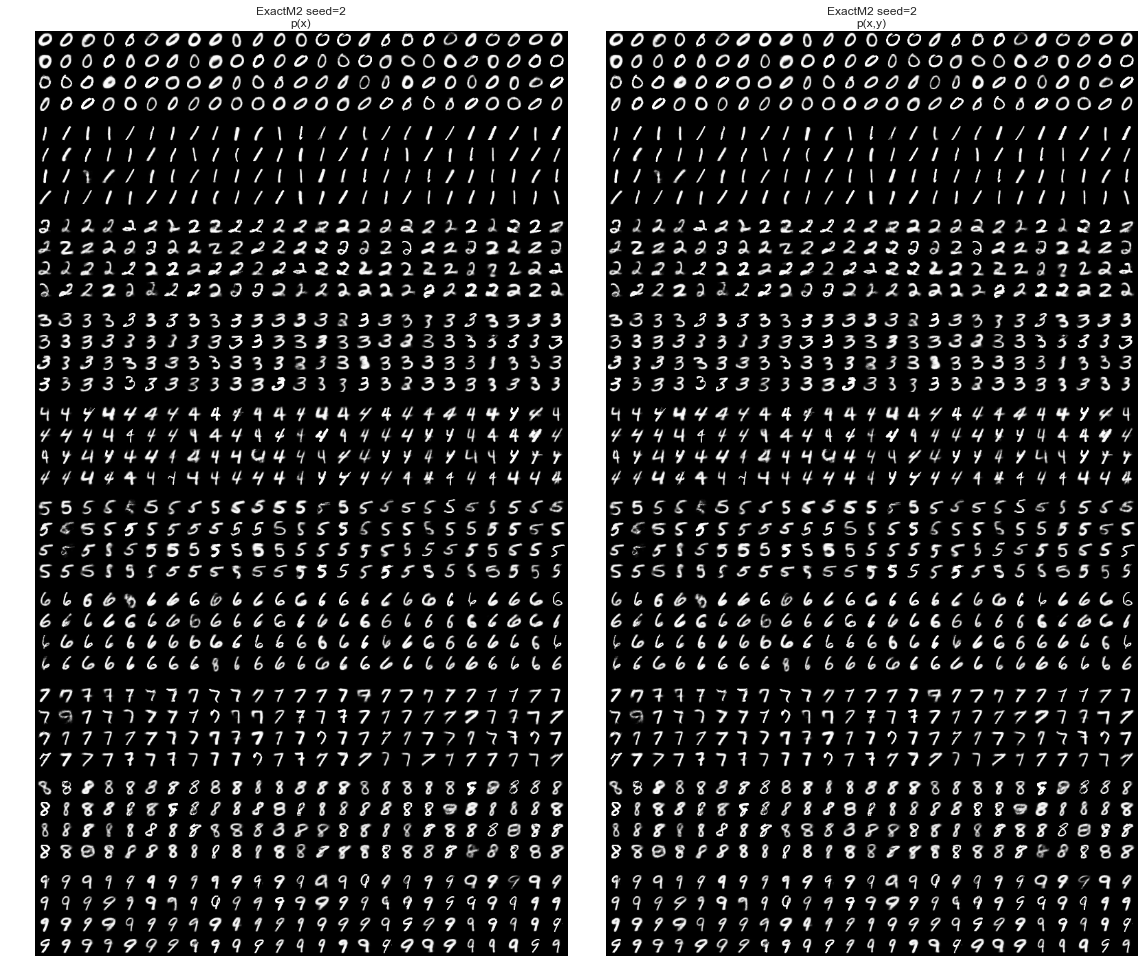

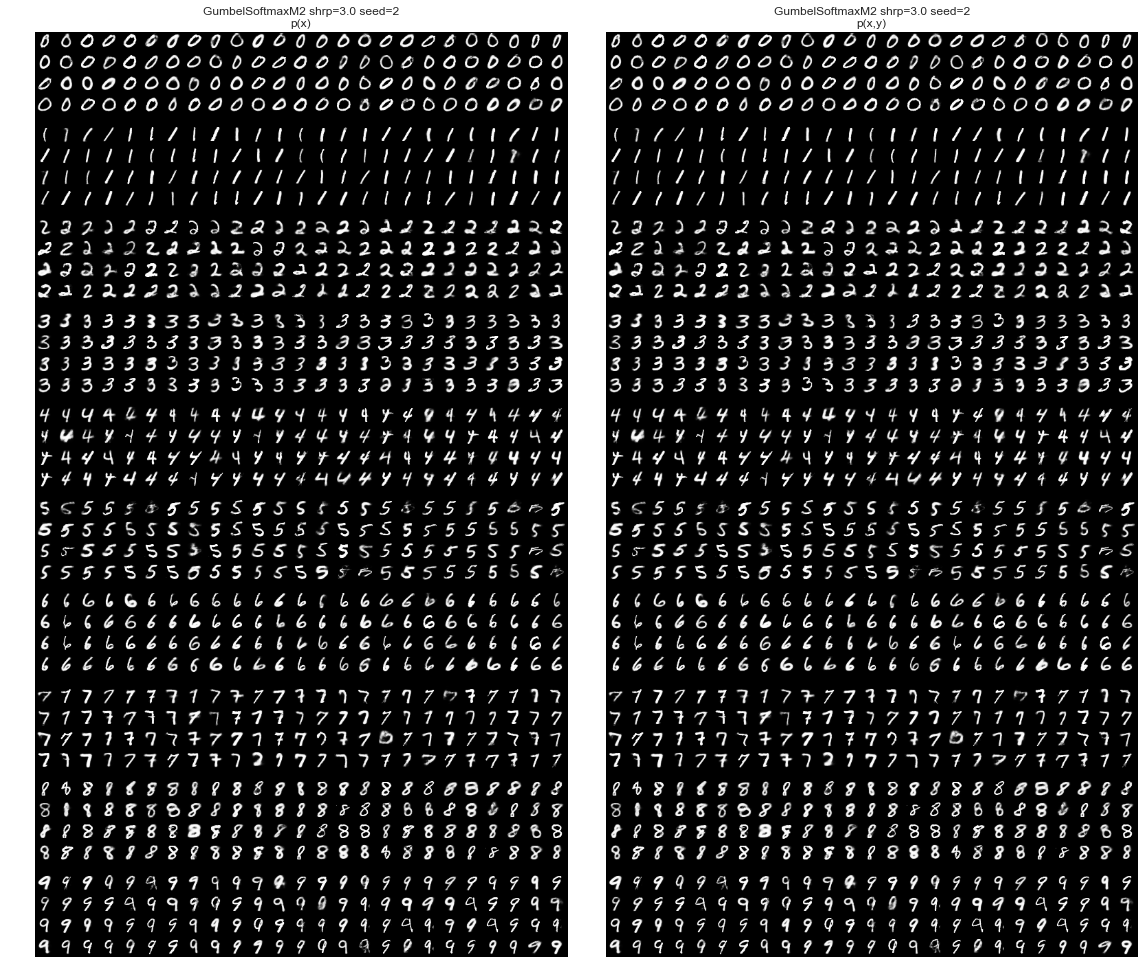

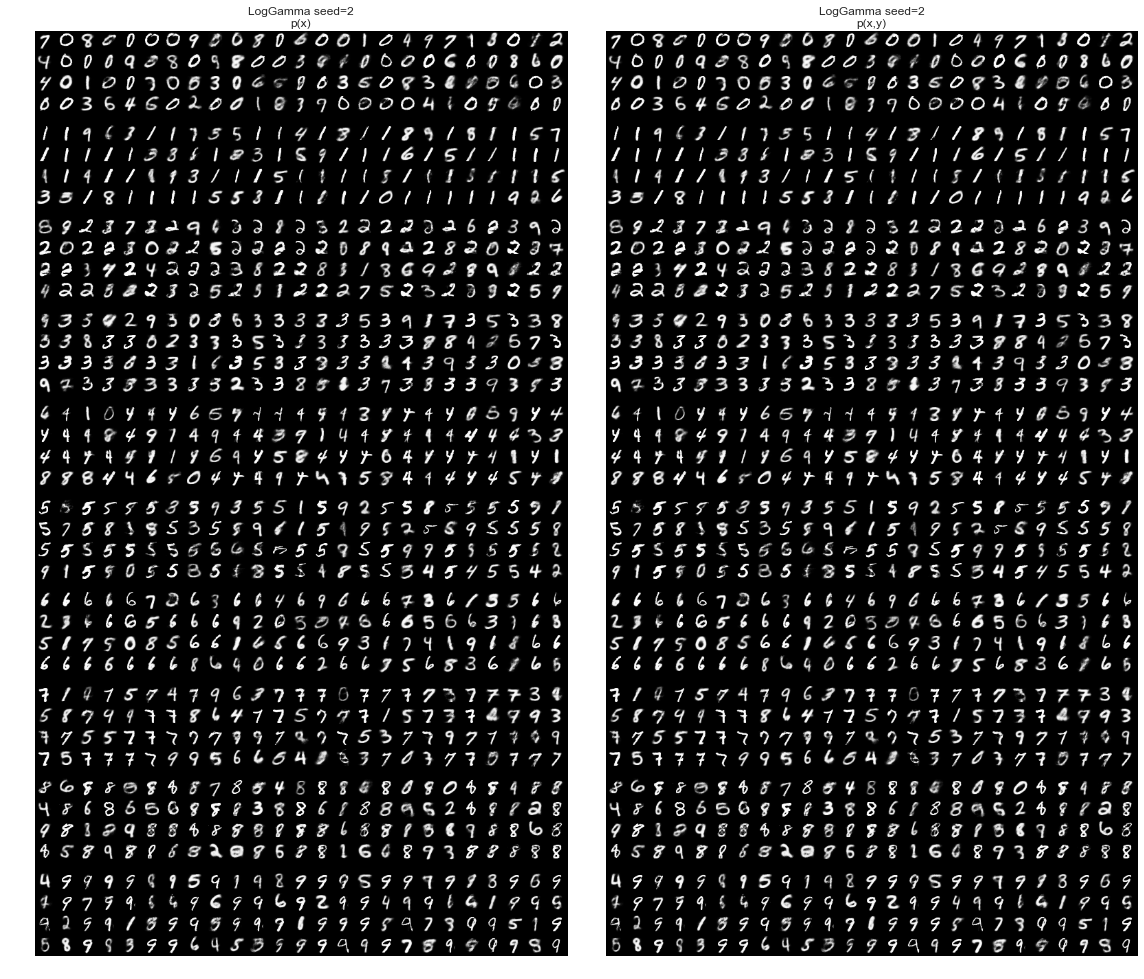

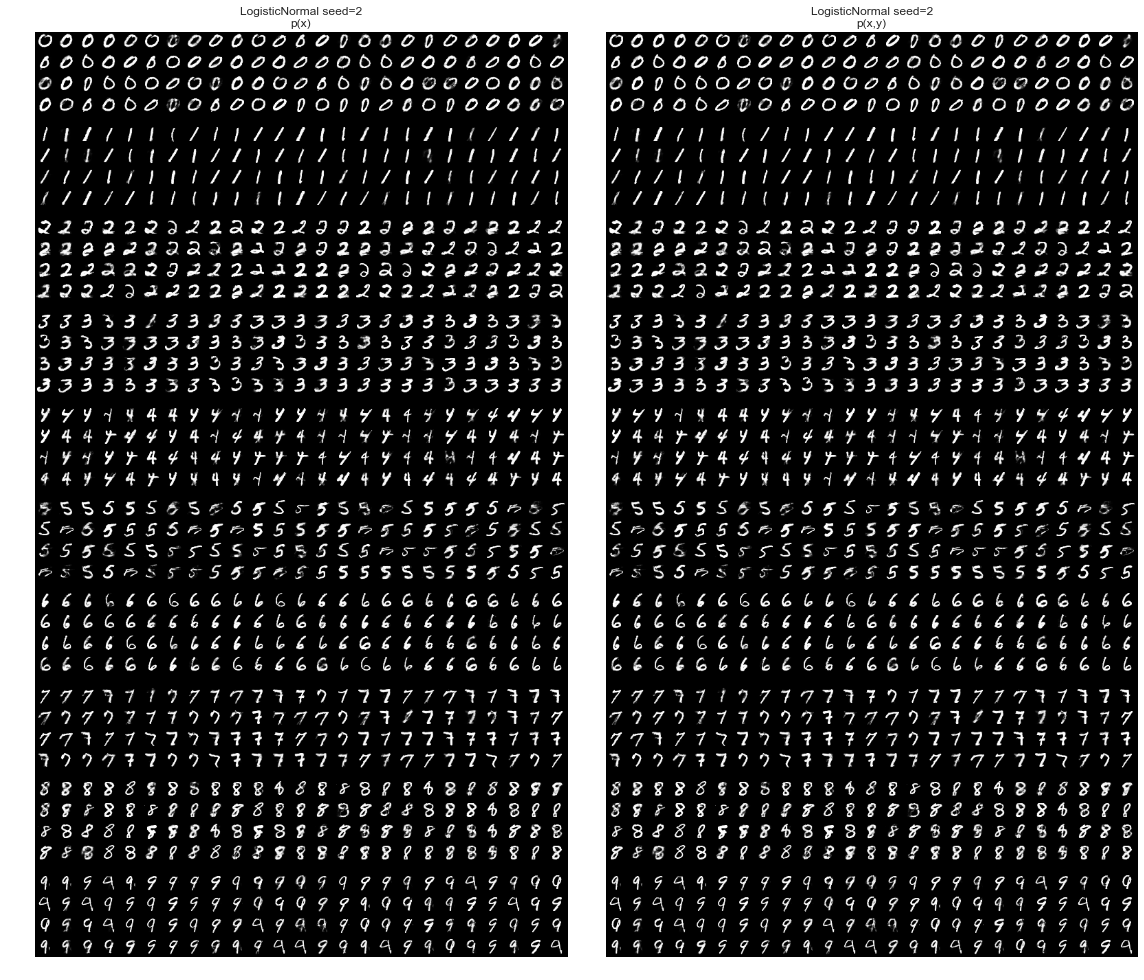

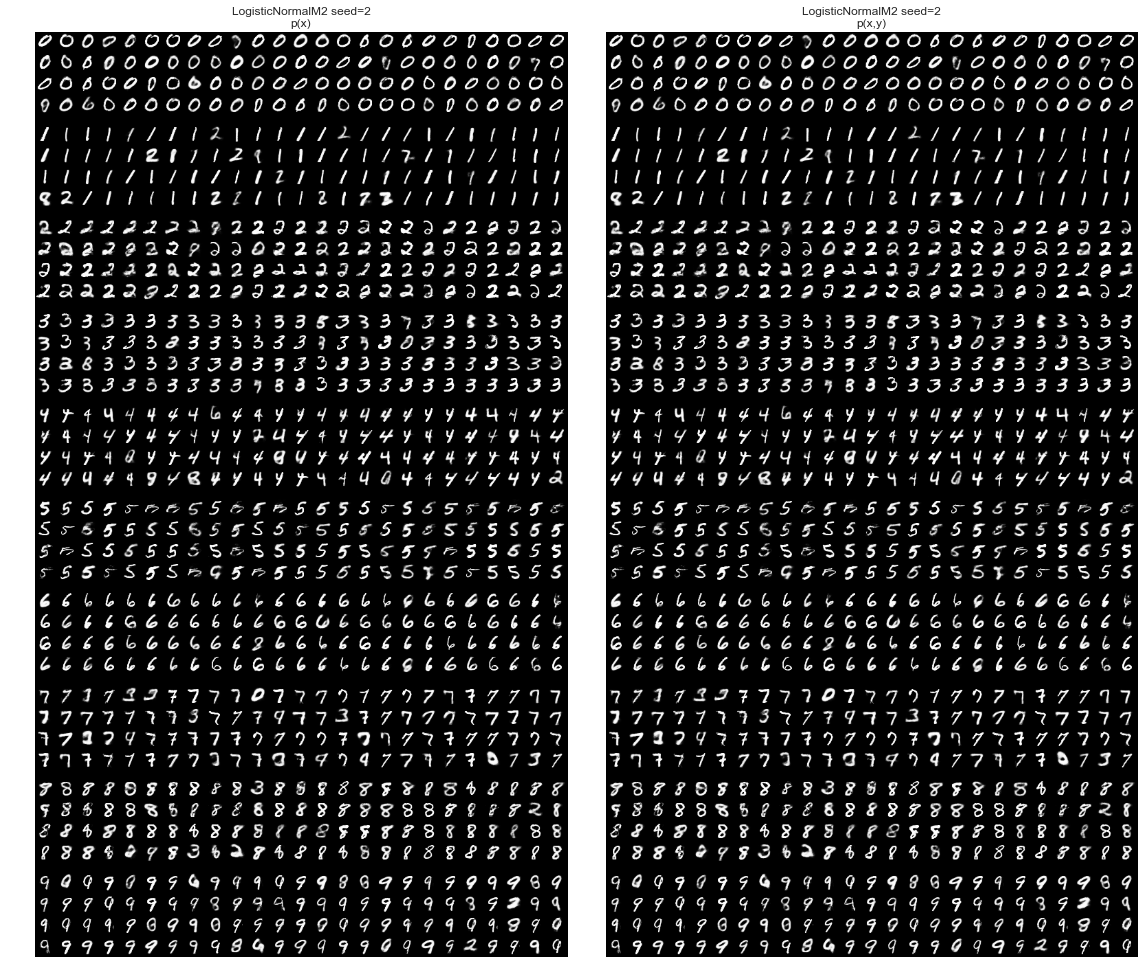

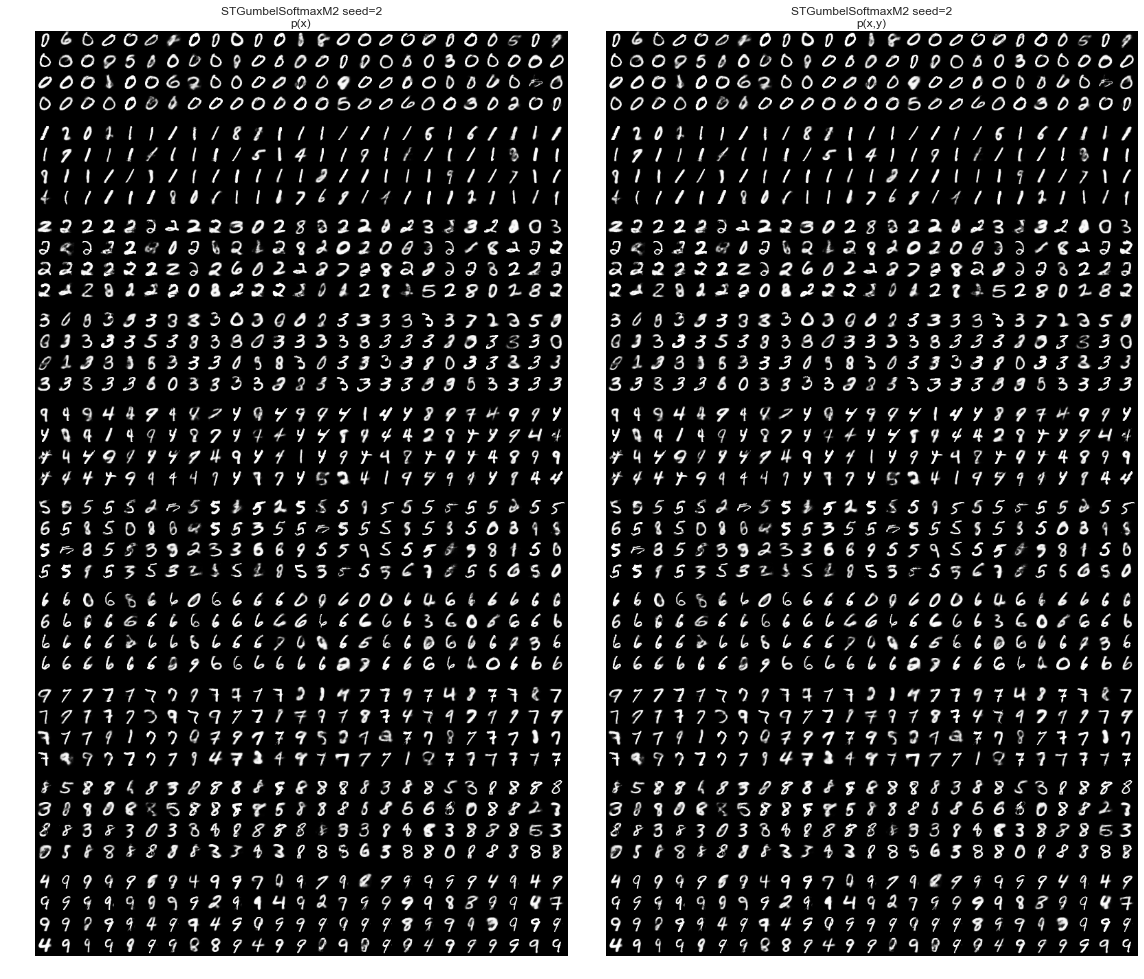

In [37]:
for k in sorted(samples_reshaped):
    if 'seed=2' in k:
        plt.figure(1,figsize=(16,16))
        plt.subplot(1,2,1)
        plt.imshow(1-todisplayimage(samples_reshaped[k,'p(x)','p'][-1000:]))
        plt.gca().grid(False)
        plt.title('%s\np(x)' % (k))
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(1-todisplayimage(samples_reshaped[k,'p(x,y)','p'][-1000:]))
        plt.gca().grid(False)
        plt.title('%s\np(x,y)' % (k))
        plt.axis('off')

        plt.tight_layout()
        plt.savefig('plots/samples_%s.png' % k.split()[0])
        plt.show()